In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

In [3]:
# Téléchargement et extraction du fichier zip
import requests, zipfile, io
zip_file_url = 'https://wp-content/uploads/cell_images.zip'
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()


In [4]:
data_dir = 'cell_images/'

In [5]:
os.listdir(data_dir)

['test', 'train']

In [9]:
test_path = data_dir + 'test/'

In [10]:
train_path = data_dir + 'train/'

In [11]:
test_path

'cell_images/test/'

In [45]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [46]:
os.listdir(train_path + 'parasitized')[0]

'C189P150ThinF_IMG_20151203_142224_cell_84.png'

In [51]:
cell_para = train_path + 'parasitized/C189P150ThinF_IMG_20151203_142224_cell_84.png'

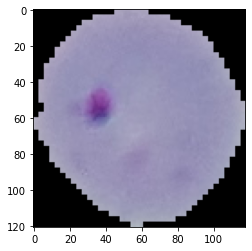

In [83]:
plt.imshow(imread(cell_para))

In [27]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [95]:
x = os.listdir(train_path + 'uninfected')[0]

In [43]:
cell_uninfec = train_path + 'uninfected/C13NThinF_IMG_20150614_131318_cell_179.png'

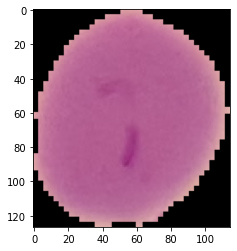

In [44]:
plt.imshow(imread(cell_uninfec))

In [53]:
len(os.listdir(train_path + 'uninfected'))

12480

In [54]:
len(os.listdir(train_path + 'parasitized'))

12480

In [66]:
dim1 = []
dim2 = []
for image_filename in os.listdir(train_path + 'uninfected'):
    img = imread(train_path + 'uninfected' + '/' +image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [69]:
dim1

[127,
 148,
 115,
 160,
 145,
 67,
 130,
 100,
 106,
 121,
 148,
 145,
 139,
 118,
 175,
 121,
 130,
 136,
 151,
 118,
 142,
 127,
 136,
 139,
 127,
 124,
 124,
 121,
 154,
 136,
 121,
 136,
 133,
 142,
 115,
 121,
 127,
 130,
 91,
 118,
 121,
 157,
 151,
 106,
 112,
 136,
 121,
 112,
 118,
 94,
 142,
 133,
 133,
 154,
 76,
 112,
 121,
 124,
 112,
 151,
 133,
 121,
 124,
 124,
 139,
 94,
 127,
 121,
 145,
 148,
 139,
 118,
 133,
 109,
 151,
 136,
 148,
 127,
 145,
 142,
 130,
 139,
 127,
 139,
 145,
 139,
 127,
 118,
 100,
 121,
 130,
 130,
 136,
 136,
 136,
 127,
 112,
 127,
 124,
 127,
 142,
 106,
 118,
 106,
 124,
 127,
 121,
 121,
 130,
 133,
 91,
 139,
 127,
 127,
 124,
 193,
 115,
 151,
 106,
 121,
 142,
 130,
 163,
 121,
 118,
 139,
 145,
 127,
 124,
 127,
 127,
 112,
 157,
 166,
 136,
 124,
 130,
 121,
 133,
 115,
 109,
 139,
 133,
 136,
 115,
 142,
 121,
 121,
 148,
 103,
 124,
 127,
 145,
 115,
 184,
 136,
 106,
 115,
 148,
 115,
 106,
 124,
 109,
 157,
 130,
 139,
 142,
 130

/Users/hk/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


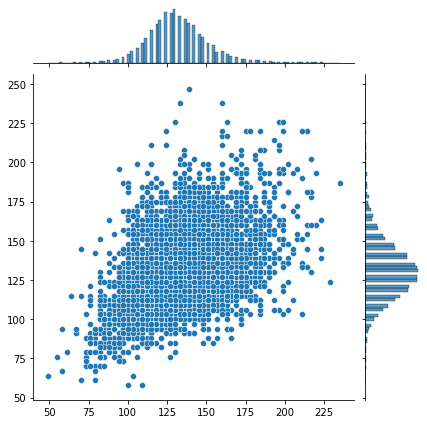

In [72]:
sns.jointplot(dim1,dim2)

In [75]:
np.mean(dim1)    

131.64820899110507

In [76]:
np.mean(dim2)

131.4041990544114

In [112]:
image_shape = (130,130,3)

In [113]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [114]:
image_gen = ImageDataGenerator(rotation_range=20,width_shift_range= 0.1, height_shift_range= 0.1, 
                              shear_range=0.1, zoom_range= 0.1, horizontal_flip= True, fill_mode='nearest')

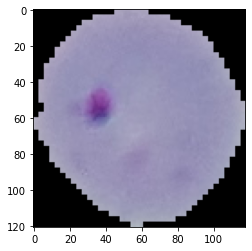

In [115]:
plt.imshow(imread(cell_para))

In [116]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [117]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [136]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

In [119]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape = image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape= image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape= image_shape, activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

model.summary()

In [120]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)      

In [127]:
batch_size= 16

In [123]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [128]:
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(130,130),
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 24958 images belonging to 2 classes.


In [130]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=(130,130),
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary',
                                              shuffle = False)

Found 2600 images belonging to 2 classes.


In [134]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [135]:
model.fit(train_image_gen, epochs=20, validation_data = test_image_gen,
          callbacks=[early_stop])

Epoch 1/20
1560/1560 [==============================] - 242s 155ms/step - loss: 0.5019 - accuracy: 0.8424 - val_loss: 0.2239 - val_accuracy: 0.9296
Epoch 2/20
1560/1560 [==============================] - 275s 177ms/step - loss: 0.2357 - accuracy: 0.9262 - val_loss: 0.2210 - val_accuracy: 0.9296
Epoch 3/20
1560/1560 [==============================] - 473s 303ms/step - loss: 0.2254 - accuracy: 0.9269 - val_loss: 0.2228 - val_accuracy: 0.9238
Epoch 4/20
1560/1560 [==============================] - 434s 278ms/step - loss: 0.2219 - accuracy: 0.9285 - val_loss: 0.2202 - val_accuracy: 0.9212
Epoch 5/20
1560/1560 [==============================] - 5365s 3s/step - loss: 0.1894 - accuracy: 0.9411 - val_loss: 0.1910 - val_accuracy: 0.9346
Epoch 6/20
1560/1560 [==============================] - 239s 153ms/step - loss: 0.1879 - accuracy: 0.9425 - val_loss: 0.1889 - val_accuracy: 0.9377
Epoch 7/20
1560/1560 [==============================] - 255s 164ms/step - loss: 0.1812 - accuracy: 0.9437 - val_lo

In [137]:
# save model
model.save_weights('malaria.h5')
print('Model Saved!')

Model Saved!


In [139]:
# load model
savedModel = model.load_weights('malaria.h5')
print('Model Loaded!')

Model Loaded!


In [142]:
hist = model.history.history

In [143]:
df = pd.DataFrame(hist)

In [144]:
df

,loss,accuracy,val_loss,val_accuracy
0,0.501862,0.842375,0.223879,0.929615
1,0.235664,0.926156,0.221027,0.929615
2,0.225416,0.926917,0.222829,0.923846
3,0.221869,0.928520,0.220209,0.921154
4,0.189401,0.941141,0.191039,0.934615
5,0.187936,0.942543,0.188943,0.937692
6,0.181208,0.943665,0.199604,0.935385
7,0.179801,0.945428,0.176191,0.940000
8,0.173779,0.945869,0.182861,0.938846
9,0.174362,0.947151,0.174343,0.945769


In [151]:
df.columns

Index(['loss', 'accuracy', 'val_loss', 'val_accuracy'], dtype='object')

<AxesSubplot:>

<Figure size 720x432 with 0 Axes>

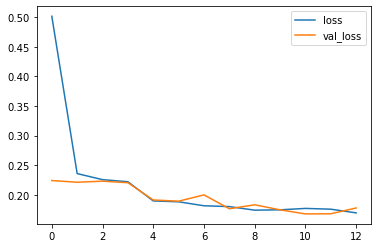

In [156]:
plt.figure(figsize=(10,6))
df[['loss', 'val_loss']].plot()

<AxesSubplot:>

<Figure size 720x432 with 0 Axes>

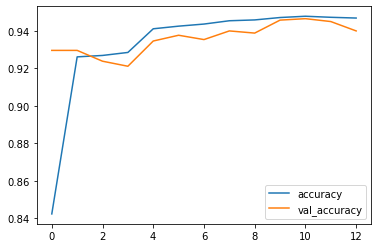

In [157]:
plt.figure(figsize=(10,6))
df[['accuracy', 'val_accuracy']].plot()

In [158]:
model.evaluate(test_image_gen)

163/163 [==============================] - 14s 87ms/step - loss: 0.1733 - accuracy: 0.9458


[0.17328767478466034, 0.9457692503929138]

In [159]:
pred = model.predict(test_image_gen)

163/163 [==============================] - 14s 87ms/step


In [160]:
pred

array([[7.7828262e-03],
       [2.2510066e-07],
       [1.9852635e-04],
       ...,
       [9.5144975e-01],
       [9.5971489e-01],
       [9.3905336e-01]], dtype=float32)

In [162]:
predictions = pred > 0.5

In [163]:
predictions

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [164]:
from sklearn.metrics import classification_report, confusion_matrix

In [166]:
print(classification_report(test_image_gen.classes, predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95      1300
           1       0.94      0.95      0.95      1300

    accuracy                           0.95      2600
   macro avg       0.95      0.95      0.95      2600
weighted avg       0.95      0.95      0.95      2600



<AxesSubplot:>

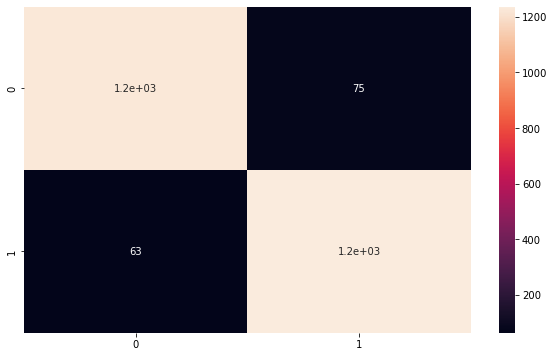

In [173]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(test_image_gen.classes, predictions),annot=True)